
# Example for obtaining an absorption spectrum from TDDFT output by applying gaussian broadening

- The procedure is based on [this article ](http://gaussian.com/uvvisplot/) from the gaussian website.
- The example data was computed for a retinal chromophor in implicit protein environment at camh-B3LYP/def2-TZVP level of theory and contains the first two vertical excitation energies (VEE) and corresponding oscillator strengths

In [1]:
# import all dependencies 
from source.gaussian_broadening import Spectrum
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# load example data (retinal chromophor in implicit protein environment at camh-B3LYP/def2-TZVP level of theory)
fname = 'data/energy.csv'
DATA = pd.read_csv(fname,usecols = ['OSC_1','E_1','OSC_2','E_2'],delimiter=',')

# extract first row (and convert nm to eV)
OSC = DATA[['OSC_1','OSC_2']].loc[0].to_list()
E   = DATA[['E_1','E_2']].loc[0].to_list()

# set x-axis and sigma values
x_axis = np.linspace(200,800, num=100, endpoint=True)
sigma  = np.linspace(0.2,0.5, num=4, endpoint=True)


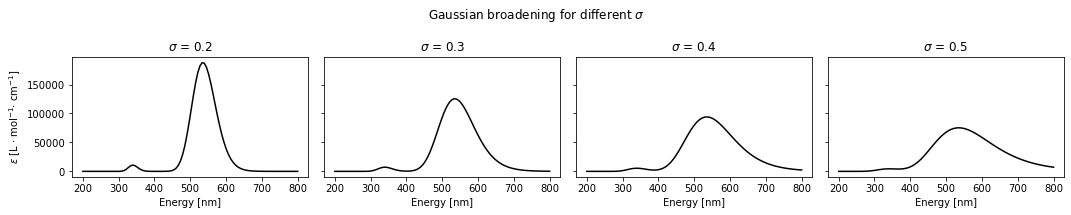

In [3]:
# initiate figure
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 3) ,sharey= True ,facecolor='white')
axes = axes.ravel()  # array to 1D

# Visualize impact of broadening factor
for sig, ax in zip(sigma, axes):
    ax.plot(x_axis,Spectrum.gaussian_broadening_wavelength(wavelength=E,oscillator=OSC,sigma=sig,x_var=x_axis),color = 'k')
    ax.set_xlabel("Energy [nm]")
    ax.set_title(f"$\sigma$ = {str(sig)}")
   
axes[0].set_ylabel("$\epsilon$ [L $\cdot$ mol$^{-1}$$\cdot$ cm$^{-1}$]",size='10')
fig.suptitle("Gaussian broadening for different $\sigma$ ")
fig.tight_layout()

## Alternatively you can use the Spectrum class to conveniently read and plot spectra

Calculating spectrum in eV (sigma = 0.4)


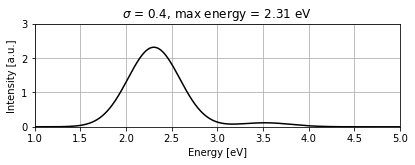

Calculating spectrum in nm (sigma = 0.4)


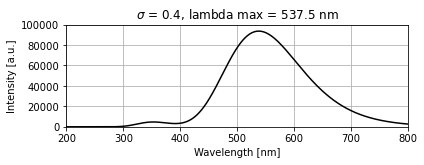

In [4]:
# Initiate the spectrum by calling the class
spectrum = Spectrum(fname=fname)

# Calculate the spectrum
spectrum.calculate_spectrum(unit="eV",sigma=0.4)

# Then plot the spectrum
spectrum.plot_spectrum()


# Or plot the spectrum directly:
spectrum = Spectrum(fname=fname)
spectrum.plot_spectrum(unit="nm",sigma=0.4)